In [1]:
import matplotlib.pyplot as plt;
import numpy as np;

In [2]:
data = np.loadtxt("../plot_finer/test.txt", delimiter=',', dtype=np.complex64);

In [3]:
data_subtracted=data[:, 4:]
np.shape(data_subtracted)

(3201, 769)

<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_8537/1862299795.py:4: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$t\omega_r$")
/tmp/ipykernel_8537/1862299795.py:5: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$p(\hbar k_L)$")
/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/transforms.py:2855: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin

Text(0, 0.5, '$p(\\hbar k_L)$')

/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


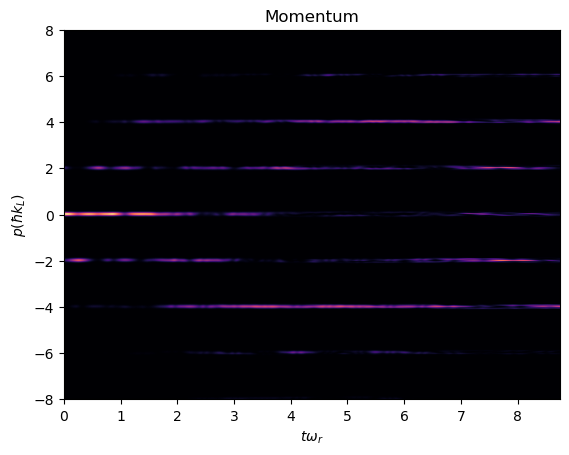

In [5]:
plt.imshow(np.square(np.abs(data_subtracted)).T, cmap = "magma", extent = [ data[0,2],data[-1,2], -16/2,16/2 ,],origin="lower",aspect = "auto")
plt.grid(False)
plt.title("Momentum")
plt.xlabel("$t\omega_r$")
plt.ylabel("$p(\hbar k_L)$")

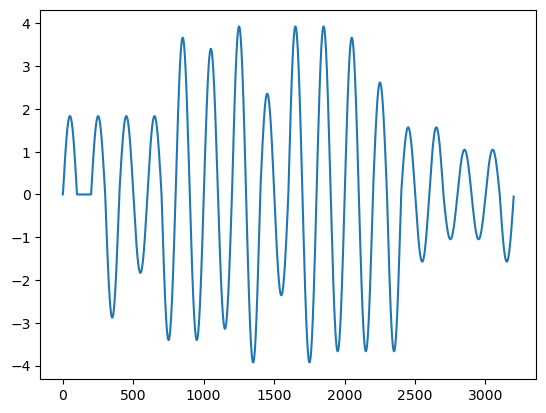

In [16]:
plt.plot(data[:,3])

In [8]:
import scipy as scp;

## FFT STYLE 1

In [ ]:
myfft = np.array([scp.fft.fft( data_subtracted[n,:]) for n in range(len(data_subtracted))])

In [ ]:
x_val=np.square(np.abs(myfft))

In [ ]:
plt.imshow(x_val.T, cmap="magma", aspect="auto")

In [ ]:
halfway = int((len(x_val[:,0])-1)/2)
halfway

In [ ]:
x_reshaped = np.concatenate( (x_val[:,halfway:], x_val[:,0:halfway+1]), axis=1 )

In [ ]:
plt.imshow(x_val[:, halfway:-1], cmap="magma", aspect="auto")

In [ ]:
plt.imshow(x_val[:,0:halfway+1], aspect = "auto")

## FFT STYLE 2

In [9]:
halfway = int((len(data_subtracted[0,:])-1)/2)
halfway
p_reshaped = np.concatenate( (data_subtracted[:,halfway:], data_subtracted[:,0:halfway+1]), axis=1 )

In [10]:
myfft = np.array([scp.fft.fft(p_reshaped[n]) for n in range(len(data_subtracted))])

In [12]:
myfft_reshaped=np.concatenate( (myfft[:,halfway:], myfft[:,0:halfway+1]), axis=1 )

## WARNING: Why aren't these normalized

In [13]:
temp = np.square(np.abs(myfft_reshaped));
myfft_reshaped_rescaled = np.array ( [ temp[m,:]/np.sum(temp[m,:])    for m in range(len(myfft_reshaped)) ] )

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_8537/1189122034.py:3: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$t\omega_r$")
/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/transforms.py:2855: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


Text(0.5, 1.0, 'Wavepacket evolution')

/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


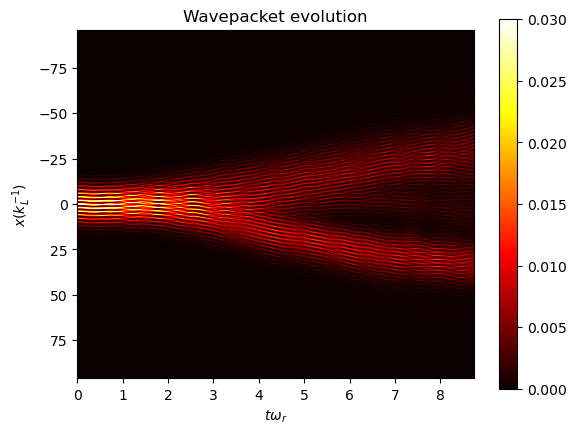

In [14]:
plt.imshow(myfft_reshaped_rescaled.T, cmap="hot",aspect="0.04", vmax=0.03, extent=[data[0,2],data[-1,2],96, -96 ])
plt.colorbar()
plt.xlabel("$t\omega_r$")
plt.ylabel("$x (k_L^{-1})$")
plt.title("Wavepacket evolution")

In [24]:
np.sum(np.square(np.abs(myfft_reshaped))[0,:])

62.14093